## Duffing oscillator

Non linear second-order differential equation that describes certain damped and driven oscillators.
Is an example of a dynamic system with chaotic behavior.

![Duffing equation](data/duffing.png)


In [1]:
from numpy import *
from matplotlib.pyplot import *

t0 = 0.0
tf = 850.0

dt = 0.05
n = int((tf-t0)/dt) +1


F0, gamma, omega, delta = 10, 0.1, pi/3, 1.5*pi
a, b = 1/4, 1/2

def f(X,t):
    x, y = X
    return array([ y, 
                   -gamma*y +2*a*x -4*b*x**3 +F0*cos(omega*t+delta) ])



X0 = array([0.2, 1.5])
X = zeros((n,2))
t = linspace(t0, tf, n)

X[0,:] = X0
for i in range(n-1):
    k1 = dt*f(X[i,:], t[i])
    k2 = dt*f(X[i,:]+0.5*k1, t[i])
    k3 = dt*f(X[i,:]+0.5*k2, t[i])
    k4 = dt*f(X[i,:]+k3, t[i])
    X[i+1,:] = X[i,:] + (k1+k4+2*(k2+k3))/6

x, y = X.T

Text(0.5, 0, 't')

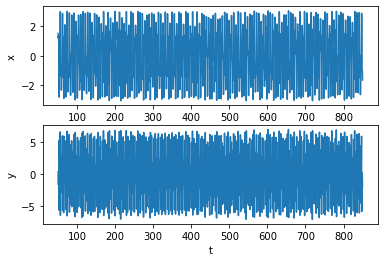

In [2]:

## Eliminar transiente:
transiente = int(50.0/dt)
x, y = x[transiente:], y[transiente:]
t = t[transiente:]


figure('time series')
subplot(2,1,1)
plot(t, x)
ylabel('x')
subplot(2,1,2)
plot(t, y)
ylabel('y')
xlabel('t')

Text(0, 0.5, 'z')

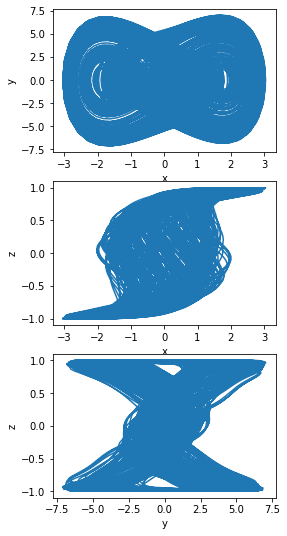

In [3]:
figure('2D projections', figsize=(4,9))
subplot(3,1,1)
plot(x, y)
xlabel('x')
ylabel('y')
subplot(3,1,2)
plot(x, cos(omega*t+delta))
xlabel('x')
ylabel('z')
subplot(3,1,3)
plot(y, cos(omega*t+delta))
xlabel('y')
ylabel('z')

Text(0, 0.5, '$x_{2\\tau}$')

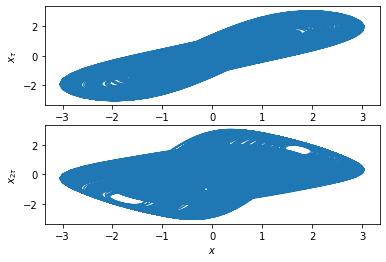

In [4]:
tau_real = 0.3
itau = int(tau_real/dt)

## coordenadas atrasadas
#xtau = x[itau:]
#x_plot = x[:-itau]
x_1 = x[2*itau:]
x_2 = x[itau:-itau]
x_3 = x[:-2*itau]

figure('2D proj, reconstructed')
subplot(2,1,1)
plot(x_1, x_2)
xlabel('$x$')
ylabel('$x_\\tau$')
subplot(2,1,2)
plot(x_1, x_3)
xlabel('$x$')
ylabel('$x_{2\\tau}$')